# Brazilian Weather Forecasting for the Northeast Region
*Justin Tice & Megan Hoeksema*

# INTRODUCTION

## Dataset

**Climate Weather Surface of Brazil - Hourly**

<a href='https://www.kaggle.com/datasets/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region'>Dataset Source</a>

The data was originally collected through the National Meteorological Institute of Brazil (INMET, INstituto de METeorologia) and contains hourly measurements of various climate related variables from 623 different INMET stations. All data was recorded with the same form of equipment, the Vaisala Automatic Weather Station AWS310. The original purpose for collection was to further the mission statement for the INMET organization, which is to make meteorological data accessible to Brazilian society to constructively influence decision-making towards sustainable development through monitoring, analyzing, and forecasting weather and climate information (<a href='https://portal.inmet.gov.br/sobre'>1</a>). 

Within the larger dataset, subsheets can be retrieved by region: central west, north, northeast, south, and southeast. For the purposes of this analysis, the focus will be weather data from the northeastern region of Brazil. Furthermore, since the northeastern dataset alone is so large, subsets will be created by stations and states within the northeast.

## Motivation

The primary motivation for this project is to implement various data science tools to a larger dataset to extract meaningful insights. Tasks include data retrieval and cleaning, manipulation of dataset features and subsetting the data, translating meaningful labels to English, implementing statistical models, and creating descriptive visualizations. 

Through the use of various python libraries, this project intends to capture a general overview of the surface climate of Brazil and identify problematic measurements that may negatively impact climate change. By understanding patterns and trends in Brazil's climate and weather data, forecasting potential future information about Brazil's weather and climate may lead to more meaninful decisions relating to sustainable development.

## Research Question and Task Definition

What trends can be identified and forecasted in surface climate data from the northeastern region of Brazil? Can future weather measurements be forecasted specific to this region, and how might this region compare to other parts of the country?

The real-word issue being addressed in this project pertains to sustainable development of a country rapidly evolving in industry amidst changing laws regarding the use of natural resources and climate law mandates. Being one of the largest countries in the Western hemisphere and with the Amazon rainforest's fires and cultivation processes converting what was one well-known as a carbon sink into a carbon source, can we identify important patterns and observations from raw data (<a href='https://www.nature.com/articles/s41586-021-03629-6.epdf?sharing_token=vki909_1OxgJvTbdT1miudRgN0jAjWel9jnR3ZoTv0NILaci0q8CXtVe4JKM-xF0Z0ZQpmJpnpSclAjJeIV-vJjhVZB1ELSuLq2p-GNgYDLfGxzn5GwYN8m5PGRJAE0Dt9eFZR91jv39MUN48s6qLGbdxBooeijIKL7Irc128uY0ZWIFBKRvYdg18gF5ni-CWZbqd7-vG8UPQy6QClmZ7XLSgqyNX22V1Fm50iIGS0Vs6SMONYeyY2PUVjnj90P-ggO6naaZPn95yX8tUW9laKy22cO-BqYAcm5JO70-mvEWksjdXXEJJxH3fKNmJO5O&tracking_referrer=news.mongabay.com'>2</a>)?

The inputs required for analysis are data records containing meteorological measurements over time. Outputs include exploratory data analyis descriptions and visualizations, the output of relevant statistical models applied to the data, and visualizations demonstrating findings and conclusions.

## Literature Review

**<a href='https://www.nature.com/articles/s41586-021-03629-6.epdf?sharing_token=vki909_1OxgJvTbdT1miudRgN0jAjWel9jnR3ZoTv0NILaci0q8CXtVe4JKM-xF0Z0ZQpmJpnpSclAjJeIV-vJjhVZB1ELSuLq2p-GNgYDLfGxzn5GwYN8m5PGRJAE0Dt9eFZR91jv39MUN48s6qLGbdxBooeijIKL7Irc128uY0ZWIFBKRvYdg18gF5ni-CWZbqd7-vG8UPQy6QClmZ7XLSgqyNX22V1Fm50iIGS0Vs6SMONYeyY2PUVjnj90P-ggO6naaZPn95yX8tUW9laKy22cO-BqYAcm5JO70-mvEWksjdXXEJJxH3fKNmJO5O&tracking_referrer=news.mongabay.com'>Amazonia as a carbon source linked to deforestation and climate change**</a> *Gatti et. al.*

**<a href='https://www.climatelinks.org/countries/brazil'>South America Regional Mission Environmental Program</a>** *climatelinks - USAID*

## Libraries

In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
#from Ipython.display import display
from matplotlib import rcParams
import folium
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import itertools
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

# PREPROCESSING

## Data Cleaning

After loading in the dataset, we first changed the column names to english. A number of rows containing -9999.0 as their 
value were then dropped. These values were excluded because no data was actually captured so instead of making the value 0, 
which could skew the data incorrectly when calculating averages per year, we chose to remove the data from the dataframe. The underlying reason is that not all weather stations began taking measurements at the same time, and there were short periods where a type of measurement was not taken. All data types were objects (strings) or floating point numbers, and the only necessary type conversion was to convert date into the pandas datetime type. Eventually, subsets were created for a particular station and state due to the sheer magnitude of the dataset, and certain visualizations were created based of a randomly selected subset of 10,000 values from the dataframe pre-limited by state. Further development may include feature engineering to make observations on a seasonal basis.

In [2]:
!ls

'Brazilian Weather Forecasting for the Northeast Region.ipynb'
'Brazilian Weather Forecasting for the Northeast Regionv_2.ipynb'
 archive
 columns_description.csv
 northeast.csv


In [2]:
weather = pd.read_csv('northeast.csv')
weather.head()

index        Data   Hora  PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
0      0  2000-05-13  00:00                           -9999.0   
1      1  2000-05-13  01:00                           -9999.0   
2      2  2000-05-13  02:00                           -9999.0   
3      3  2000-05-13  03:00                           -9999.0   
4      4  2000-05-13  04:00                           -9999.0   

   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                              -9999       
1                                              -9999       
2                                              -9999       
3                                              -9999       
4                                              -9999       

   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
0                                          -9999.0   
1                                          -9999.0   
2                                          -9999.0   
3                                          -9999.0   
4                                          -9999.0   

   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  RADIACAO GLOBAL (Kj/m²)  \
0                                           -9999.0                    -9999   
1                                           -9999.0                    -9999   
2                                           -9999.0                    -9999   
3                                           -9999.0                    -9999   
4                                           -9999.0                    -9999   

   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
0                                       -9999.0   
1                                       -9999.0   
2                                       -9999.0   
3                                       -9999.0   
4                                       -9999.0   

   TEMPERATURA DO PONTO DE ORVALHO (°C)  ...  \
0                               -9999.0  ...   
1                               -9999.0  ...   
2                               -9999.0  ...   
3                               -9999.0  ...   
4                               -9999.0  ...   

   VENTO, DIREÇÃO HORARIA (gr) (° (gr))  VENTO, RAJADA MAXIMA (m/s)  \
0                                 -9999                     -9999.0   
1                                 -9999                     -9999.0   
2                                 -9999                     -9999.0   
3                                 -9999                     -9999.0   
4                                 -9999                     -9999.0   

   VENTO, VELOCIDADE HORARIA (m/s)  region  state   station  station_code  \
0                          -9999.0      NE     BA  SALVADOR          A401   
1                          -9999.0      NE     BA  SALVADOR          A401   
2                          -9999.0      NE     BA  SALVADOR          A401   
3                          -9999.0      NE     BA  SALVADOR          A401   
4                          -9999.0      NE     BA  SALVADOR          A401   

    latitude  longitude  height  
0 -13.016667 -38.516667   51.41  
1 -13.016667 -38.516667   51.41  
2 -13.016667 -38.516667   51.41  
3 -13.016667 -38.516667   51.41  
4 -13.016667 -38.516667   51.41  

[5 rows x 27 columns]

In [3]:
weather.columns

Index(['index', 'Data', 'Hora', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)', 'region', 'state', 'station',
       'station_code', 'latitude', 'longitude', 'height'],
      dtype='object')

In [4]:
weather.dtypes

index                                                      int64
Data                                                      object
Hora                                                      object
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         float64
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)      int64
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          float64
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         float64
RADIACAO GLOBAL (Kj/m²)                                    int64
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             float64
TEMPERATURA DO PONTO DE ORVALHO (°C)                     float64
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               float64
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               float64
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         float64
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         float64
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                   int64
UMIDADE REL. MIN. NA HORA

In [3]:
# translating columns to english
translated_columns = ['index', 'date', 'time', 'total_precip_last_hour_mm', 'atmos_pressure_station_mb', 
                      'max_atmos_pressure_last_hour_mb', 'min_atmos_pressure_last_hour_mb', 'solar_radiation',
                     'air_temp_c', 'dew_point_c', 'max_temp_last_hour_c', 'min_temp_last_hour_c', 'max_dew_point_last_hour_c',
                     'min_dew_point_last_hour_c', 'max_humidity_pct', 'min_humidity_pct', 'relative_air_humidity_pct',
                     'wind_direction', 'wind_gust', 'wind_speed', 'region', 'state', 'station', 'station_code', 
                     'latitude', 'longitude', 'height']
weather.columns = translated_columns

# Drop rows containing -9999.0.
weather = weather[weather != -9999.0].dropna()

# Drop explicit index column
weather.drop('index', axis=1, inplace=True)

# Convert the 'date' column to datetime format
weather['date'] = pd.to_datetime(weather['date'], format='%Y-%m')

weather.sample(8)

date   time  total_precip_last_hour_mm  \
8824296  2015-11-12  09:00                        0.0   
12696007 2018-07-19  16:00                        0.0   
11960145 2017-09-27  13:00                        0.0   
7081723  2013-06-04  16:00                        0.0   
8664015  2015-09-17  15:00                        0.0   
14167881 2019-06-16  20:00                        0.0   
7835390  2014-11-09  12:00                        0.0   
14828869 2020-12-29  16:00                        0.0   

          atmos_pressure_station_mb  max_atmos_pressure_last_hour_mb  \
8824296                       976.0                            976.4   
12696007                      963.0                            963.7   
11960145                      968.0                            968.6   
7081723                       986.0                            987.3   
8664015                       956.0                            957.1   
14167881                      986.0                            986.3   
7835390                      1014.0                           1013.5   
14828869                     1012.0                           1012.5   

          min_atmos_pressure_last_hour_mb  solar_radiation  air_temp_c  \
8824296                             975.1             57.0        23.4   
12696007                            962.8           1816.0        25.8   
11960145                            968.0           3276.0        30.3   
7081723                             986.3           1605.0        29.4   
8664015                             956.2           3183.0        27.8   
14167881                            985.9            688.0        33.2   
7835390                            1013.4           1684.0        27.9   
14828869                           1011.9           2984.0        29.5   

          dew_point_c  max_temp_last_hour_c  ...  wind_direction  wind_gust  \
8824296          11.8                  23.5  ...           208.0        1.6   
12696007         16.2                  26.9  ...           160.0        8.3   
11960145         13.7                  30.7  ...           140.0       12.4   
7081723          20.5                  29.4  ...            44.0        4.4   
8664015          13.1                  28.3  ...           131.0        9.1   
14167881          9.2                  34.2  ...           125.0        6.2   
7835390          20.6                  28.3  ...            56.0        6.1   
14828869         14.8                  30.3  ...            95.0        5.5   

          wind_speed  region  state            station  station_code  \
8824296          0.6      NE     PI   VALENCA DO PIAUI          A363   
12696007         4.6      NE     PE           OURICURI          A366   
11960145         2.9      NE     CE               TAUA          A324   
7081723          0.4      NE     BA          ITABERABA          A408   
8664015          4.2      NE     BA   SENHOR DO BONFIM          A428   
14167881         3.1      NE     PI  SAO JOAO DO PIAUI          A331   
7835390          2.0      NE     PE             RECIFE          A301   
14828869         1.9      NE     SE            ARACAJU          A409   

           latitude  longitude  height  
8824296   -6.399167 -41.740000  301.00  
12696007  -7.884722 -40.101111  464.00  
11960145  -6.016667 -40.281667  415.00  
7081723  -12.516667 -40.300000  249.89  
8664015  -10.443056 -40.148333  539.00  
14167881  -8.364444 -42.252500  231.00  
7835390   -8.059167 -34.959444   10.00  
14828869 -10.952413 -37.054330    3.72  

[8 rows x 26 columns]

## Subsetting based on Station Code

In [4]:
# subset station A401
station_A401 = weather[weather.station_code == 'A401']
# station_A401.sample(5)

In [5]:
# Further subsetting the data to exclude dates prior to 2016
station_A401_sub = (station_A401['date'] >= '2016-01-01')
station_A401 = station_A401.loc[station_A401_sub]

# Resetting the Index
station_A401.set_index('date', inplace = True)

# Group by 'date' and take the mean - this gives us average per day
station_A401 = station_A401.groupby('date').mean()
# station_A401.sample(5)

display(station_A401.head(50))
# station_A401.to_csv('station_A401.csv')

total_precip_last_hour_mm  atmos_pressure_station_mb  \
date                                                               
2016-01-01                   0.000000                1006.615385   
2016-01-02                   0.000000                1005.769231   
2016-01-03                   0.000000                1004.769231   
2016-01-04                   1.400000                1005.846154   
2016-01-05                   2.142857                1007.857143   
2016-01-06                   1.630769                1007.923077   
2016-01-07                   0.000000                1006.076923   
2016-01-08                   0.015385                1007.538462   
2016-01-09                   0.138462                1008.384615   
2016-01-10                   1.415385                1008.538462   
2016-01-11                   0.000000                1008.000000   
2016-01-12                   0.015385                1006.461538   
2016-01-13                   0.000000                1005.692308   
2016-01-14                   0.000000                1006.153846   
2016-01-15                   0.000000                1006.307692   
2016-01-16                   0.000000                1004.461538   
2016-01-17                   0.000000                1005.769231   
2016-01-18                   0.138462                1005.538462   
2016-01-19                   0.000000                1004.307692   
2016-01-20                   0.000000                1004.692308   
2016-01-21                   0.757143                1005.357143   
2016-01-22                   0.046154                1005.692308   
2016-01-23                   1.353846                1008.000000   
2016-01-24                   0.000000                1007.846154   
2016-01-25                   0.015385                1008.153846   
2016-01-26                   0.000000                1007.076923   
2016-01-27                   0.000000                1006.923077   
2016-01-28                   0.000000                1008.384615   
2016-01-29                   0.000000                1009.642857   
2016-01-30                   0.000000                1009.153846   
2016-01-31                   0.000000                1009.307692   
2016-02-01                   0.000000                1009.615385   
2016-02-02                   0.230769                1007.923077   
2016-02-03                   0.138462                1007.615385   
2016-02-04                   0.000000                1007.923077   
2016-02-05                   0.015385                1009.692308   
2016-02-06                   0.000000                1010.384615   
2016-02-07                   0.000000                1009.692308   
2016-02-08                   0.000000                1010.769231   
2016-02-09                   0.000000                1011.384615   
2016-02-10                   0.000000                1009.307692   
2016-02-11                   0.000000                1006.692308   
2016-02-12                   0.000000                1006.076923   
2016-02-13                   0.000000                1006.692308   
2016-02-14                   0.000000                1006.769231   
2016-02-15                   0.000000                1008.615385   
2016-02-16                   0.000000                1008.846154   
2016-02-17                   0.000000                1008.076923   
2016-02-18                   0.000000                1007.692308   
2016-02-19                   1.830769                1008.538462   

            max_atmos_pressure_last_hour_mb  min_atmos_pressure_last_hour_mb  \
date                                                                           
2016-01-01                      1007.000000                      1006.476923   
2016-01-02                      1006.315385                      1005.715385   
2016-01-03                      1004.953846                      1004.292308   
2016-01-04                      1006.207692                      1005.19230

## Subsetting Based on State

In [6]:
pernambuco = weather[weather.state == 'PE']

In [7]:
pernambuco = pernambuco[['date', 'time', 'total_precip_last_hour_mm', 'atmos_pressure_station_mb', 'solar_radiation', 
                         'air_temp_c', 'relative_air_humidity_pct', 'wind_speed', 'region', 'state', 'station', 'station_code',
                        'latitude', 'longitude', 'height']]

# pernambuco.sample(5)

In [8]:
# Group by 'date' and take the mean - this gives us average per day
pernambuco.groupby('date').mean()

# Further subsetting the data to exclude dates prior to 2016
pernambuco_sub = (pernambuco['date'] >= '2020-01-01')
pernambuco = pernambuco.loc[pernambuco_sub]

# Make the 'date' column the dataframe index
pernambuco.index = pernambuco['date']
del pernambuco['date']
pernambuco.sample(5)

time  total_precip_last_hour_mm  atmos_pressure_station_mb  \
date                                                                      
2020-10-24  16:00                        0.0                      919.0   
2021-01-30  13:00                        0.0                      976.0   
2020-05-10  13:00                        0.0                      979.0   
2020-08-21  16:00                        0.0                      974.0   
2021-02-28  15:00                        0.0                      969.0   

            solar_radiation  air_temp_c  relative_air_humidity_pct  \
date                                                                 
2020-10-24           2237.0        26.1                       58.0   
2021-01-30           1291.0        27.9                       18.0   
2020-05-10           1622.0        25.5                       18.0   
2020-08-21           3157.0        31.0                       16.0   
2021-02-28           1792.0        28.7                       51.0   

            wind_speed region state    station station_code  latitude  \
date                                                                    
2020-10-24         3.7     NE    PE    CARUARU         A341 -8.365278   
2021-01-30         0.3     NE    PE    CABROBO         A329 -8.504000   
2020-05-10         0.0     NE    PE    CABROBO         A329 -8.504000   
2020-08-21         2.1     NE    PE    CABROBO         A329 -8.504000   
2021-02-28         3.5     NE    PE  PETROLINA         A307 -9.388323   

            longitude  height  
date                           
2020-10-24 -36.028333  852.00  
2021-01-30 -39.315280  342.74  
2020-05-10 -39.315280  342.74  
2020-08-21 -39.315280  342.74  
2021-02-28 -40.523262  372.72

## EDA

In [12]:
pernambuco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53203 entries, 2020-01-25 to 2021-04-30
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       53203 non-null  object 
 1   total_precip_last_hour_mm  53203 non-null  float64
 2   atmos_pressure_station_mb  53203 non-null  float64
 3   solar_radiation            53203 non-null  float64
 4   air_temp_c                 53203 non-null  float64
 5   relative_air_humidity_pct  53203 non-null  float64
 6   wind_speed                 53203 non-null  float64
 7   region                     53203 non-null  object 
 8   state                      53203 non-null  object 
 9   station                    53203 non-null  object 
 10  station_code               53203 non-null  object 
 11  latitude                   53203 non-null  float64
 12  longitude                  53203 non-null  float64
 13  height                     53

In [13]:
pernambuco.describe()

total_precip_last_hour_mm  atmos_pressure_station_mb  solar_radiation  \
count               53203.000000               53203.000000     53203.000000   
mean                    0.075063                 960.034923      1532.074094   
std                     0.944921                  22.471948      1121.541842   
min                     0.000000                 915.000000         0.000000   
25%                     0.000000                 955.000000       477.000000   
50%                     0.000000                 965.000000      1496.000000   
75%                     0.000000                 974.000000      2457.000000   
max                    66.400000                1016.000000      4360.000000   

         air_temp_c  relative_air_humidity_pct    wind_speed      latitude  \
count  53203.000000               53203.000000  53203.000000  53203.000000   
mean      27.510264                  53.329342      2.733579     -8.497219   
std        4.141601                  23.514784      1.476148      0.441085   
min       13.300000                  10.000000      0.000000     -9.388323   
25%       24.400000                  34.000000      1.700000     -8.598889   
50%       27.700000                  53.000000      2.700000     -8.504000   
75%       30.700000                  71.000000      3.700000     -8.059167   
max       39.300000                 100.000000      9.200000     -7.839722   

          longitude        height  
count  53203.000000  53203.000000  
mean     -38.051686    473.426556  
std        1.586304    208.372910  
min      -40.523262     11.300000  
25%      -39.315280    342.740000  
50%      -38.295082    434.230000  
75%      -36.493381    499.020000  
max      -34.959167    852.000000

In [9]:
pe_data_profile = ProfileReport(pernambuco, title="Weather Data Profile Report for the State of Pernambuco")
pe_data_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
pernambuco.station.unique()

array(['CARUARU', 'CABROBO', 'GARANHUNS', 'ARCO VERDE', 'PETROLINA',
       'OURICURI', 'FLORESTA', 'IBIMIRIM', 'PALMARES', 'SURUBIM',
       'SERRA TALHADA', 'RECIFE', 'SALGUEIRO'], dtype=object)

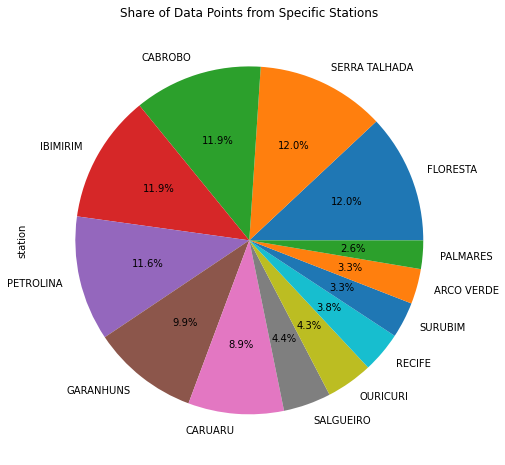

In [25]:
pernambuco.station.value_counts(normalize=True).plot.pie(figsize=(8,8), 
                                                         autopct = '%.1f%%', 
                                                         title='Share of Data Points from Specific Stations')
plt.show()

In [26]:
pernambuco.columns

Index(['time', 'total_precip_last_hour_mm', 'atmos_pressure_station_mb',
       'solar_radiation', 'air_temp_c', 'relative_air_humidity_pct',
       'wind_speed', 'region', 'state', 'station', 'station_code', 'latitude',
       'longitude', 'height'],
      dtype='object')

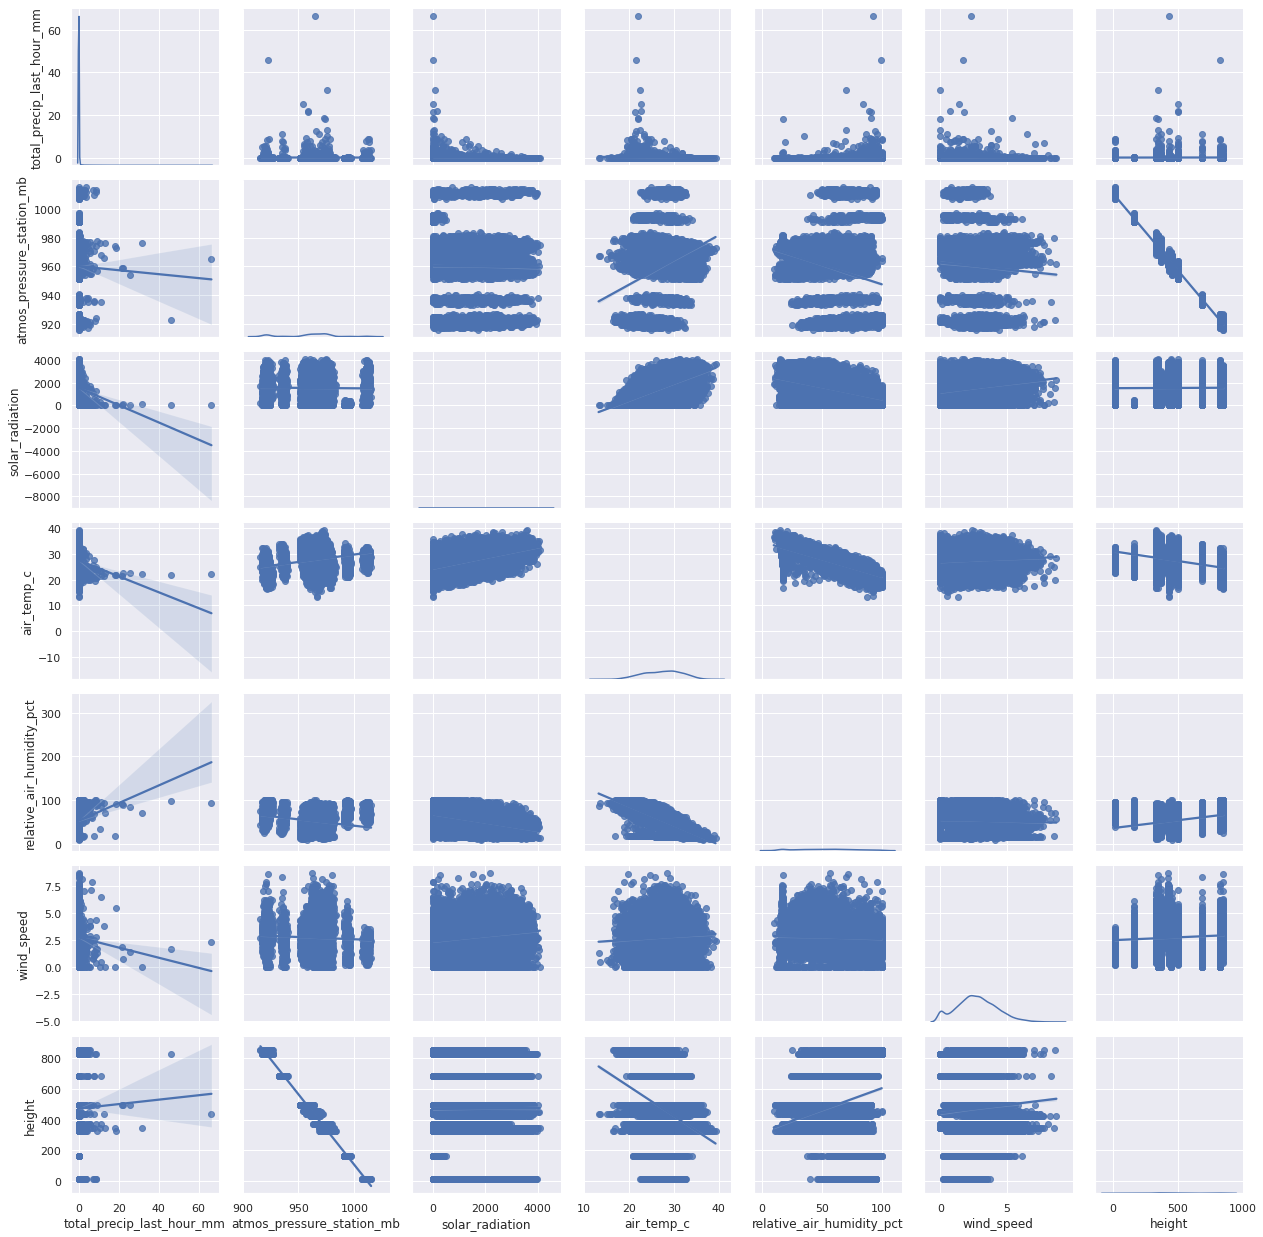

In [58]:
pe_distrib_vars = pernambuco[['total_precip_last_hour_mm', 'atmos_pressure_station_mb', 'solar_radiation', 'air_temp_c',
               'relative_air_humidity_pct', 'wind_speed', 'height']].sample(10000, random_state=1).reset_index()

gr = sns.PairGrid(pe_distrib_vars)
gr.map_diag(sns.kdeplot)
gr.map_offdiag(sns.regplot)

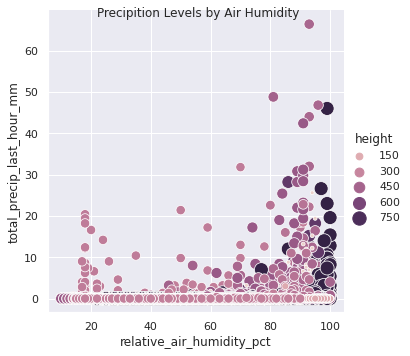

In [63]:
g = sns.relplot(
    x='relative_air_humidity_pct', y='total_precip_last_hour_mm',
    size='height', sizes=(15, 200),
    hue='height',
    data=pernambuco)
g.fig.suptitle('Precipition Levels by Air Humidity')
plt.show()

In [10]:
# get the coordinates of the unique weather measurement stations
n = len(pernambuco.station.unique())
unique_stations = pernambuco.loc[pernambuco['station'] == 'CARUARU'].head(1)
for i in range(1,n):
    unique_stations = pd.concat([unique_stations, 
                                 pernambuco.loc[pernambuco['station'] == pernambuco.station.unique()[i]].head(1)])
lats = unique_stations.latitude
longs = unique_stations.longitude

# create a map and add markers for each station
m = folium.Map(location=[-7.98254, -38.31237],
              zoom_start=7,
              tiles='Stamen Terrain')
for i in range(len(unique_stations)):
    folium.Marker([lats[i], longs[i]]).add_to(m)

# display the map
m

# ANALYSIS

## Overview of Methods Used

*Proposed method overview for tackling the research question*


1. Time-Series Decomposition 
    - decomposes time series data into three distinct components (Trend, Seasonality, and Noise).
    - Implementation: from statsmodels.tsa.seasonal import seasonal_decompose
    - Models include: Additive and Multiplicative
    
   
2. ARIMA
    - Implementation: from statsmodels.tsa.arima.model import ARIMA


3. SARIMA 
    - Seasonal Autoregressive Integrated Moving Average
    - Has three parameters (p, d, q). These parameters account for seasonality, trend, and noise in data.

## Implementation

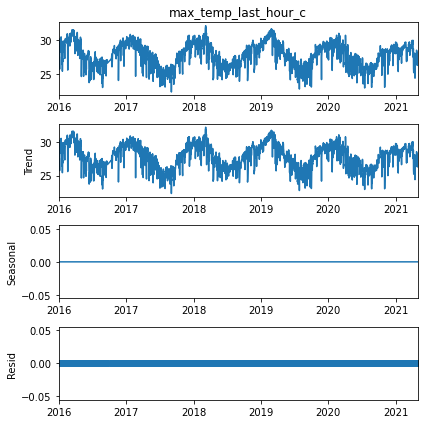

In [10]:
# Implementation of Time-Series Decomposition
result_add = seasonal_decompose(station_A401.max_temp_last_hour_c, model = 'additive', extrapolate_trend = 'freq', period = 1)
plt.rcParams.update({'figure.figsize': (6,6)})
result_add.plot()
plt.show()

In [11]:
# Implementation of SARIMA method

p = d = q = range(0,2)

pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(station_A401.max_temp_last_hour_c, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
        results = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74459D+00    |proj g|=  3.06741D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.067D-06   4.745D+00
  F =   4.7445901089214075     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:18249.693558911735
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variab

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74496D+00    |proj g|=  2.11724D-01

At iterate    5    f=  1.73371D+00    |proj g|=  9.98562D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      8      1     0     0   1.029D-07   1.734D+00
  F =   1.7337105775491344     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6671.850881253971
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d


At iterate    5    f=  1.75564D+00    |proj g|=  4.66584D+00

At iterate   10    f=  1.74540D+00    |proj g|=  2.99972D-02

At iterate   15    f=  1.74530D+00    |proj g|=  7.75229D-02

At iterate   20    f=  1.74517D+00    |proj g|=  3.30275D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     29      1     0     0   1.553D-05   1.745D+00
  F =   1.7451664245990131     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6717.910069007804
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts


At iterate    5    f=  1.73392D+00    |proj g|=  4.23996D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   2.792D-06   1.734D+00
  F =   1.7339150735182132     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6674.637372751048
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42447D+00    |proj g|=  2.16851D-01


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  4.37444D+00    |proj g|=  5.24995D-02

At iterate   10    f=  4.12354D+00    |proj g|=  5.18692D-01

At iterate   15    f=  4.08468D+00    |proj g|=  5.79893D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     68      2     0     0   1.293D-05   4.085D+00
  F =   4.0846817775682869     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:15713.686116527631
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.34288D+00    |proj g|=  2.08183D-01

At iterate    5    f=  4.25555D+00    |proj g|=  9.03825D-02

At iterate   10    f=  3.99786D+00    |proj g|=  4.88015D-01

At iterate   15    f=  3.66933D+00    |proj g|=  1.26219D+00

At iterate   20    f=  3.48820D+00    |proj g|=  6.89693D-02

At iterate   25    f=  3.48762D+00    |proj g|=  6.68902D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact    

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61456D+00    |proj g|=  1.85419D-01

At iterate    5    f=  1.59287D+00    |proj g|=  4.91042D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   8.714D-06   1.593D+00
  F =   1.5928716048488725     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6132.184192248764
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  1.77900D+00    |proj g|=  1.24535D+00

At iterate   15    f=  1.74244D+00    |proj g|=  3.40625D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     40      1     0     0   6.296D-07   1.742D+00
  F =   1.7424350258512018     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6707.405109423722
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.21993D+00    |proj g|=  3.55354D-02


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.82877D+00    |proj g|=  2.99878D+00

At iterate   10    f=  2.11334D+00    |proj g|=  5.94070D-01

At iterate   15    f=  1.96652D+00    |proj g|=  6.09464D-01

At iterate   20    f=  1.86353D+00    |proj g|=  2.30447D-01

At iterate   25    f=  1.80955D+00    |proj g|=  3.21238D-01

At iterate   30    f=  1.78210D+00    |proj g|=  6.98625D-01

At iterate   35    f=  1.76771D+00    |proj g|=  7.77715D-01

At iterate   40    f=  1.75758D+00    |proj g|=  8.09120D-01

At iterate   45    f=  1.75216D+00    |proj g|=  3.83786D-01

At iterate   50    f=  1.74910D+00    |proj g|=  1.16204D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.62755D+00    |proj g|=  1.05500D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   6.132D-06   1.628D+00
  F =   1.6275523477155378     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6265.566329313959
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61712D+00    |proj g|=  1.81895D-01


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.59362D+00    |proj g|=  1.45275D-02

At iterate   10    f=  1.59339D+00    |proj g|=  1.41858D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   1.419D-06   1.593D+00
  F =   1.5933879166833500     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:6136.169927564164
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53888D+00    |proj g|=  9.13104D-04

           * 

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      5      1     0     0   2.150D-06   1.853D+00
  F =   1.8528872309325697     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:7128.204290166663
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59635D+00    |proj g|=  2.12296D-01

At iterate    5    f=  1.53132D+00    |proj g|=  3.45857D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52625D+00    |proj g|=  9.80690D-03

At iterate    5    f=  1.52592D+00    |proj g|=  1.71828D-02

At iterate   10    f=  1.52484D+00    |proj g|=  2.21602D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   1.161D-06   1.525D+00
  F =   1.5248364604220463     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:5870.52102678319
RUNNING THE L-B

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts


At iterate    5    f=  1.53156D+00    |proj g|=  1.28760D-02

At iterate   10    f=  1.53149D+00    |proj g|=  2.37255D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     15      1     0     0   2.373D-07   1.531D+00
  F =   1.5314851556963345     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:5896.091908808103
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts


At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46948D+00    |proj g|=  9.04233D-02

At iterate    5    f=  1.46019D+00    |proj g|=  3.92595D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   3.926D-06   1.460D+00
  F =   1.4601868352985750     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:5619.878568558319
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= 

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57607D+00    |proj g|=  2.68919D-01

At iterate    5    f=  1.45530D+00    |proj g|=  2.99575D-02

At iterate   10    f=  1.45423D+00    |proj g|=  1.24697D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   8.451D-06   1.454D+00
  F =   1.4542258579745784     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:5598.952649770228
RUNNING THE L-

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts


At iterate    5    f=  1.44774D+00    |proj g|=  2.70933D-03

At iterate   10    f=  1.44672D+00    |proj g|=  1.31774D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     16      1     0     0   1.319D-06   1.447D+00
  F =   1.4465762574197831     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:5571.532286036486


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66156D+00    |proj g|=  1.53080D-01

At iterate    5    f=  1.64161D+00    |proj g|=  2.61626D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   3.757D-07   1.642D+00
  F =   1.6416130229756083     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:6319.643686364189
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.45897D+00    |proj g|=  7.55528D-02

At iterate   10    f=  1.45352D+00    |proj g|=  2.53289D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   1.233D-05   1.454D+00
  F =   1.4535196224346374     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:5598.236467883616
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53918D+00    |proj g|=  3.05100D-03

           * 

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restor


At iterate    5    f=  1.52726D+00    |proj g|=  2.91922D-02

At iterate   10    f=  1.52697D+00    |proj g|=  3.10018D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     17      1     0     0   4.975D-05   1.527D+00
  F =   1.5269738279635379     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:5878.7413423477665
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70787D+00    |proj g|=  6.59328D-06

           *

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55635D+00    |proj g|=  2.08993D-01

At iterate    5    f=  1.48867D+00    |proj g|=  1.28770D-01

At iterate   10    f=  1.48416D+00    |proj g|=  1.77922D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     18      1     0     0   2.435D-07   1.484D+00
  F =   1.4841592323915762     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:5714.076407778002
RUNNING THE L-

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  1.52676D+00    |proj g|=  5.74771D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_mod

Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     62      2     0     0   7.310D-05   1.527D+00
  F =   1.5267567022786837     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:5877.906276963818
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58877D+00    |proj g|=  5.54730D-01


 This problem is unconstrained.



At iterate    5    f=  1.52739D+00    |proj g|=  7.59951D-01

At iterate   10    f=  1.51996D+00    |proj g|=  2.33343D+00

At iterate   15    f=  1.49709D+00    |proj g|=  3.34137D+00

At iterate   20    f=  1.49675D+00    |proj g|=  1.59943D-01

At iterate   25    f=  1.49571D+00    |proj g|=  6.64601D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     59      1     0     0   2.737D-03   1.496D+00
  F =   1.4956764325442122     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:5760.37155956504
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59686D+00    |proj g|=  1.48495D-01

At iterate    5    f=  1.58090D+00    |proj g|=  5.77682D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.47977D+00    |proj g|=  3.99416D-02

At iterate   10    f=  1.47964D+00    |proj g|=  9.93889D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     21      1     0     0   9.939D-06   1.480D+00
  F =   1.4796377773364247     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:5698.686891635889
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d


At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47366D+00    |proj g|=  1.05145D-01

At iterate    5    f=  1.46083D+00    |proj g|=  2.02593D-01

At iterate   10    f=  1.46079D+00    |proj g|=  1.05104D-01

At iterate   15    f=  1.46071D+00    |proj g|=  6.41307D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     33      1     0     0   8.308D-04   1.461D+00
  F =   1.4607095554023670     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:5623.888950077504
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2

 This problem is unconstrained.



At iterate   10    f=  1.45231D+00    |proj g|=  7.11223D-02

At iterate   15    f=  1.45100D+00    |proj g|=  1.53030D+00

At iterate   20    f=  1.44960D+00    |proj g|=  3.32279D-02

At iterate   25    f=  1.44882D+00    |proj g|=  7.88452D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     42      1     0     0   7.885D-03   1.449D+00
  F =   1.4488150455906710     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:5580.14266534172
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55002D+00    |proj g|=  2.14106D-01


 This problem is unconstrained.



At iterate    5    f=  1.46597D+00    |proj g|=  1.47216D-01

At iterate   10    f=  1.44544D+00    |proj g|=  2.81953D-02

At iterate   15    f=  1.44425D+00    |proj g|=  5.69533D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     21      1     0     0   4.257D-05   1.444D+00
  F =   1.4442493262628033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:5562.582908806741
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  1.45052D+00    |proj g|=  3.55897D-02

At iterate   20    f=  1.44914D+00    |proj g|=  2.09913D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     41      1     0     0   5.719D-04   1.449D+00
  F =   1.4491405994121167     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:5581.394745339001
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52386D+00    |proj g|=  5.48521D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.46591D+00    |proj g|=  3.02285D-01

At iterate   10    f=  1.45865D+00    |proj g|=  8.77391D-02

At iterate   15    f=  1.45326D+00    |proj g|=  1.50751D-01

At iterate   20    f=  1.44848D+00    |proj g|=  2.22470D-01

At iterate   25    f=  1.44735D+00    |proj g|=  3.88264D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     64      1     0     0   4.950D-03   1.447D+00
  F =   1.4473450246808526     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:5576.488964922559
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59478D+00    |proj g|=  1.48481D-01

At iterate    5    f=  1.57910D+00    |proj g|=  1.67926D-03

           * * *

Tit   = total number of iterations
Tnf   = total number o

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55959D+00    |proj g|=  2.00001D-01

At iterate    5    f=  1.45458D+00    |proj g|=  8.73123D-02

At iterate   10    f=  1.44272D+00    |proj g|=  2.27697D-02

At iterate   15    f=  1.44264D+00    |proj g|=  5.37989D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     25      1     0     0   5.380D-05   1.443D+00
  F =   1.4426438170460099     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts

SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:5714.971860862741
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80557D+00    |proj g|=  5.29483D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.295D-06   1.806D+00
  F =   1.8055748490445778     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:6948.240869425446
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts


At iterate    5    f=  1.49032D+00    |proj g|=  3.82972D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   8.067D-06   1.490D+00
  F =   1.4903172514615544     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:5737.760149121138
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48417D+00    |proj g|=  1.02987D-02

           * * *

Tit   = total number of iterations
Tnf   = total number o

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts


At iterate    5    f=  1.48334D+00    |proj g|=  2.29141D-02

At iterate   10    f=  1.48279D+00    |proj g|=  3.71372D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   3.714D-06   1.483D+00
  F =   1.4827869945064518     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:5710.7987808718135
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68431D+00    |proj g|=  1.47379D-01


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.66930D+00    |proj g|=  2.35736D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   2.357D-06   1.669D+00
  F =   1.6692984286054073     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:6426.121756416396
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62507D+00    |proj g|=  2.27962D-01


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.49347D+00    |proj g|=  1.24698D-01

At iterate   10    f=  1.48949D+00    |proj g|=  7.85948D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     16      1     0     0   6.294D-05   1.489D+00
  F =   1.4894948603987908     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:5736.597233093749
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42925D+00    |proj g|=  2.05097D-01

At iterate   

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/ts


At iterate    5    f=  1.40355D+00    |proj g|=  2.86136D-03

At iterate   10    f=  1.40355D+00    |proj g|=  1.20388D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     16      1     0     0   1.204D-06   1.404D+00
  F =   1.4035514101118971     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:5406.058723290356
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.75722D+00    |proj g|=  1.52712D-01


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.70823D+00    |proj g|=  2.60211D-02

At iterate   10    f=  1.70795D+00    |proj g|=  1.03683D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     18      1     0     0   1.037D-04   1.708D+00
  F =   1.7079477916592309     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:6574.7672067214025


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55645D+00    |proj g|=  2.88736D-01

At iterate    5    f=  1.41497D+00    |proj g|=  1.79289D-01

At iterate   10    f=  1.40952D+00    |proj g|=  1.06371D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   8.564D-06   1.410D+00
  F =   1.4095051662401412     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:5428.956869359583
RUNNING THE L-

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  1.40434D+00    |proj g|=  1.66600D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     16      1     0     0   1.666D-06   1.404D+00
  F =   1.4043351331999749     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:5409.072922287103
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41761D+00    |proj g|=  2.00785D-01


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.40326D+00    |proj g|=  3.28654D-03

At iterate   10    f=  1.40250D+00    |proj g|=  2.67940D-02

At iterate   15    f=  1.40212D+00    |proj g|=  6.29211D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     22      1     0     0   6.813D-06   1.402D+00
  F =   1.4021179940177690     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:5402.54580499234
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.57909D+00    |proj g|=  2.29881D-02

At iterate   10    f=  1.57868D+00    |proj g|=  9.44703D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     17      1     0     0   3.802D-06   1.579D+00
  F =   1.5786780994731051     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:6079.595970573562
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57832D+00    |proj g|=  2.58392D-01


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.42745D+00    |proj g|=  1.84902D-01

At iterate   10    f=  1.40972D+00    |proj g|=  5.74395D-02

At iterate   15    f=  1.40932D+00    |proj g|=  7.73666D-03

At iterate   20    f=  1.40930D+00    |proj g|=  2.33322D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     33      1     0     0   2.333D-05   1.409D+00
  F =   1.4093007804103943     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:5430.170801458376


The output of our code suggests that SARIMA(1, 1, 1)x(1, 1, 1, 12)12 with the lowest AIC being 5430.17.

In [12]:
# Fitting the SARIMAX model using optimal parameters

mod = sm.tsa.statespace.SARIMAX(station_A401.max_temp_last_hour_c, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)

results = mod.fit()

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57832D+00    |proj g|=  2.58392D-01

At iterate    5    f=  1.42745D+00    |proj g|=  1.84902D-01

At iterate   10    f=  1.40972D+00    |proj g|=  5.74395D-02

At iterate   15    f=  1.40932D+00    |proj g|=  7.73666D-03

At iterate   20    f=  1.40930D+00    |proj g|=  2.33322D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     33      1     0     0   2.333D-05   1.409D+00
  F =   1.4093007804103943     

CONVERG

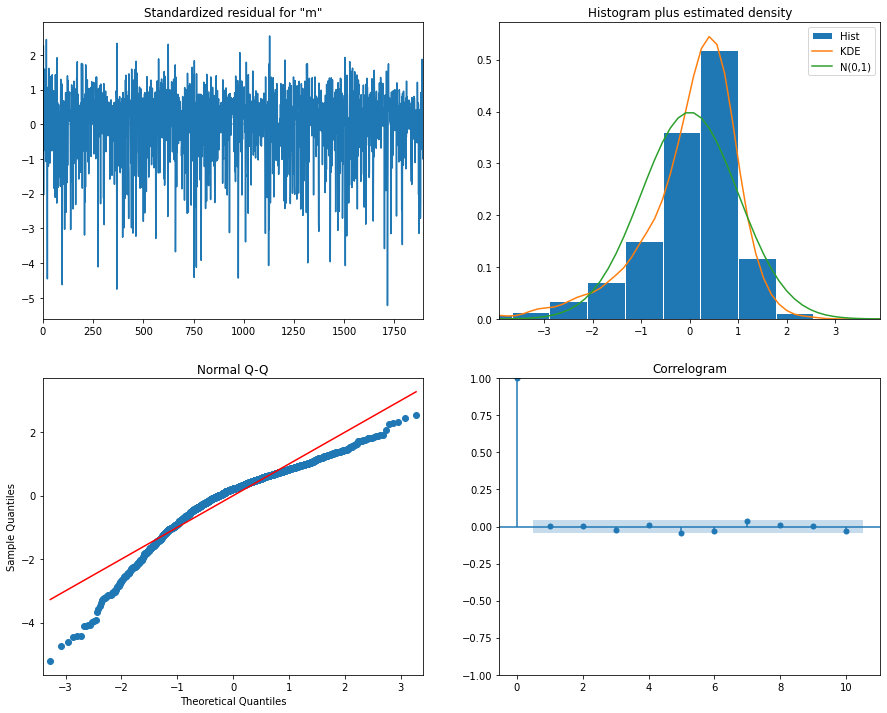

In [13]:
# Plotting the SARIMAX Model Diagnostics

results.plot_diagnostics(figsize=(15, 12))
plt.show()

## Visualizations

In [89]:
# Data visualization activity (box plot, bar plot, violin plot, and pairplot to see relationships and distribution, etc.).
# Describe anything you find in the data after each visualization.
# What data visualization helped you understand about data distribution.
# What you did about possible outlier as per data distribution visualization. 
# (Did you confirm with your client whether it is actually an outlier or put a disclosure statement in your notebook 
# if you decided to remove it?)

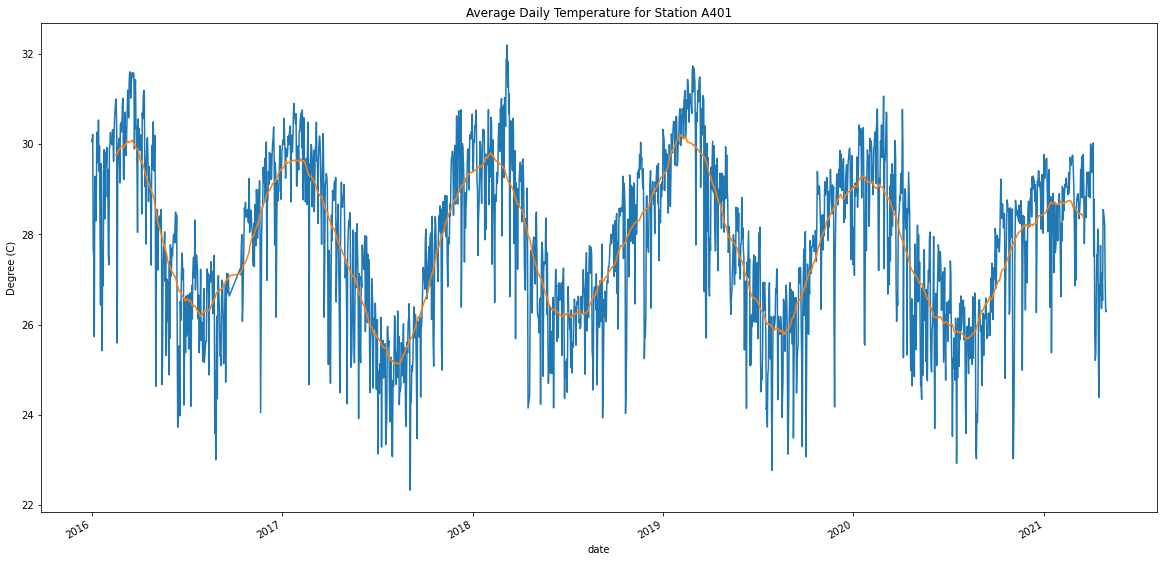

In [13]:
fig, axes = plt.subplots(1,1, figsize = (20,10))
station_A401['max_temp_last_hour_c'].plot(title='Average Daily Temperature for Station A401', xlabel = 'Date', ylabel = "Degree (C)")
station_A401['max_temp_last_hour_c'].rolling(90, center=True).mean().plot()

plt.show()

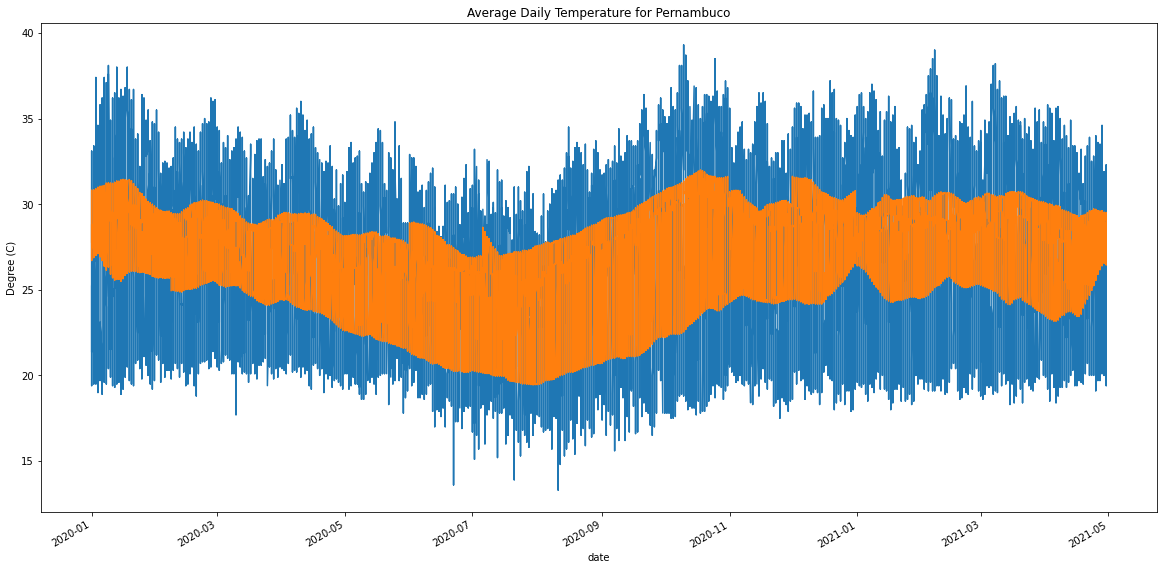

In [14]:
fig, axes = plt.subplots(1,1, figsize = (20,10))
pernambuco['air_temp_c'].plot(title='Average Daily Temperature for Pernambuco', xlabel = 'Date', ylabel = "Degree (C)")
pernambuco['air_temp_c'].rolling(365, center=True).mean().plot()

plt.show()

<AxesSubplot:xlabel='air_temp_c', ylabel='solar_radiation'>

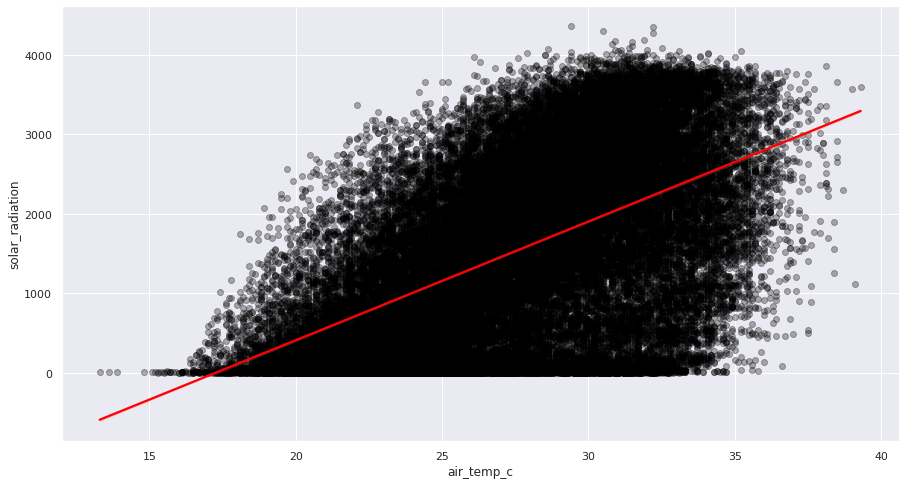

In [63]:
sns.set(rc = {'figure.figsize':(15,8)})
reg = sns.regplot(x='air_temp_c', y='solar_radiation', data=pernambuco, 
                  scatter_kws={'alpha':0.3, 'color':'black'}, 
                  line_kws={'color':'red'})
reg


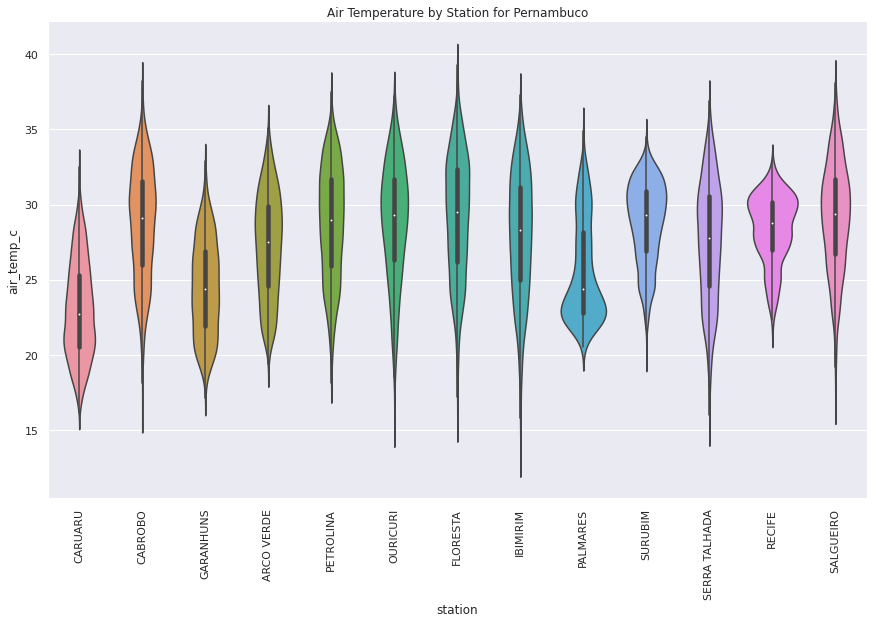

In [14]:
sns.set(rc = {'figure.figsize':(15,8)})

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8

ax = sns.catplot(x='station', y='air_temp_c', kind='violin', data=pernambuco)
ax.set_xticklabels(rotation = 90)
ax.fig.set_size_inches(15,8)
ax.set(title='Air Temperature by Station for Pernambuco')


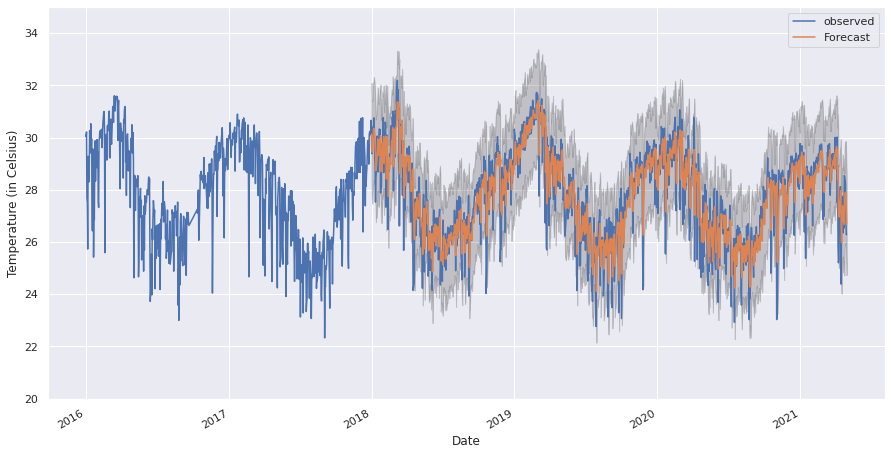

The Mean Squared Error of our forecasts is 0.99


In [25]:
sns.set(rc = {'figure.figsize':(15,8)})

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8

pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = station_A401.max_temp_last_hour_c['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([20,35])
plt.legend()
plt.show()

y_forecasted = pred.predicted_mean
y_truth = station_A401.max_temp_last_hour_c['2018-01-01':]

# Compute the mean square error
mse = MSE(y_truth, y_forecasted, squared=True)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))